In [14]:
# データセットを読み込み
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sys,os
sys.path.append(os.pardir)
from tools.models.classifiers.linear_subgrad_svm import LinearSubgradSVM
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tools.data_generator.clustered_data_generator import ClusteredDataGenerator
from tools.utils.plot.cluster_plot import ClusterPlotter

In [15]:
cancer = load_breast_cancer()
data_df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [16]:
X=data_df.values
y=cancer.target
y[y==0]=-1
X.shape,y.shape

((569, 30), (569,))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [47]:
model=LinearSubgradSVM(lam=0.0001, lr=0.0001, max_iter=100000, epsilon=0.0000001)
model.fit(X_train,y_train)

iter 1000 loss 84.99343883812315
iter 2000 loss 84.87719833701496
iter 3000 loss 84.76172421653875
iter 4000 loss 84.66776838144658
iter 5000 loss 84.58237225064943
iter 6000 loss 84.3485644263648
iter 7000 loss 84.2716358094274
iter 8000 loss 84.19441886380056
iter 9000 loss 83.96005361145315
iter 10000 loss 83.88249138600577
iter 11000 loss 83.64762305672795
iter 12000 loss 83.569717794008
iter 13000 loss 83.4915371389677
iter 14000 loss 83.2560992511146
iter 15000 loss 83.17758623274081
iter 16000 loss 83.0988044865268
iter 17000 loss 82.86656588306751
iter 18000 loss 82.7948985419384
iter 19000 loss 82.6528425244282
iter 20000 loss 82.62219193944595
iter 21000 loss 82.47986752899814
iter 22000 loss 82.3373736745635
iter 23000 loss 82.19470993618894
iter 24000 loss 82.05851201861411
iter 25000 loss 81.94932873119095
iter 26000 loss 81.86388784558233
iter 27000 loss 81.77831976427743
iter 28000 loss 81.69347921986396
iter 29000 loss 81.58099839272049
iter 30000 loss 81.47897269191807

In [48]:
acc=model.evaluate(X_test,y_test)
print(f"{acc*100:.2f} %")

97.50 %


In [49]:
mus=np.array([[2,-2],[-2,2]])
sigmas=np.array([np.eye(2),np.eye(2)])
data_gen=ClusteredDataGenerator(mus,sigmas)

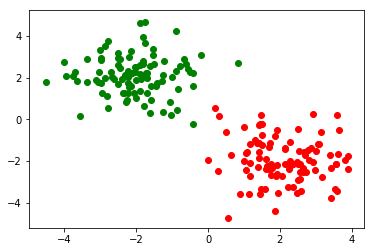

((160, 2), (40, 2), (160,), (40,))

In [50]:
X,y=data_gen.run(100)
plotter=ClusterPlotter()
plotter.plot(X,y)
y[y==0]=-1
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [51]:
model=LinearSubgradSVM(lam=0.01, lr=0.00001, max_iter=100000, epsilon=0.00001)
model.fit(X_train,y_train)

iter 1000 loss 94.60456987831294
iter 2000 loss 92.57971500017746
iter 3000 loss 90.59037681399715
iter 4000 loss 89.05232405071533
iter 5000 loss 87.13295115650571
iter 6000 loss 85.15562440615132
iter 7000 loss 83.3306374123007
iter 8000 loss 81.68488957853627
iter 9000 loss 79.67020252950029
iter 10000 loss 78.17389212307148
iter 11000 loss 76.37255294112495
iter 12000 loss 74.58728465973057
iter 13000 loss 72.82050452657928
iter 14000 loss 71.57493597208338
iter 15000 loss 69.93948508593566
iter 16000 loss 68.33220203775194
iter 17000 loss 66.7490615832735
iter 18000 loss 65.17723152550226
iter 19000 loss 64.00120875548888
iter 20000 loss 62.403886302034095
iter 21000 loss 61.22957917238376
iter 22000 loss 59.657489770664625
iter 23000 loss 58.43910133924533
iter 24000 loss 57.32630164027551
iter 25000 loss 55.90906793840702
iter 26000 loss 54.91546318424874
iter 27000 loss 53.62021602405129
iter 28000 loss 52.17168720874304
iter 29000 loss 51.140303829587374
iter 30000 loss 50.124

In [52]:
acc=model.evaluate(X_test,y_test)
print(f"{acc*100:.2f} %")

100.00 %


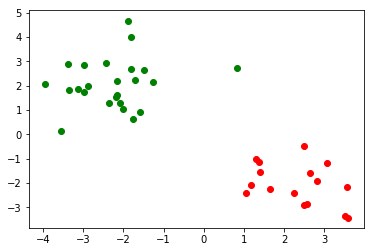

In [53]:
y_test[y_test==-1]=0
plotter.plot(X_test,y_test)

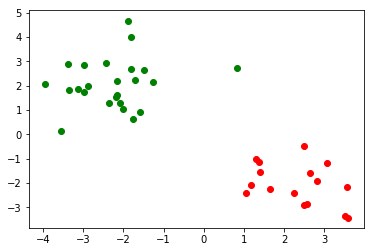

In [54]:
pred=model.predict(X_test)
pred[pred==-1]=0
plotter.plot(X_test,pred)